In [1]:
import pandas as pd
import warnings
import os

warnings.filterwarnings("ignore")

In [2]:
client_df = pd.read_csv('Client.csv')
client_df.head()

,Client_Type,Sen_Of_Client,#_of_accidents,PROV_RES,RATING,Gender,Child,FLG_APP,Premium,ID,DOB
0,PF,NaN,0.0,NaN,4.0,F,N,N,405.0,805793,1994.0
1,PF,NaN,0.0,NaN,4.0,F,N,N,743.0,660814,1980.0
2,PF,NaN,0.0,NaN,4.0,F,N,N,329.0,802736,1963.0
3,PF,NaN,0.0,NaN,4.0,F,N,N,438.0,642841,1989.0
4,PF,NaN,0.0,NaN,4.0,M,Y,N,206.0,802169,1973.0


In [3]:
contract_df = pd.read_csv('Contract_Dates.csv')
contract_df.head()

,CONTRACT_CODE,ID,COP,Risk_Type,Product,Status,UW_Cond,#_of_inst,Payment_Modality_UW,Payment_Modality_Inst,...,Third-Party_Liabiltiy,Third-Party_Liability_Others,Third-Party_Liability_Wheels,GAR_TELEMATICA_APP_E_GO,Aggression,Vandalism,Uninsured_Car_Cov,Effective_Date,Closing_Date,Expiration_Date
0,001000016&001000,728731,Telefono,Car,Auto,Storno amministrativo,Nuovo Contratto,0,Altro,NaN,...,1,0,NaN,NaN,NaN,0,NaN,01JUL2014:00:00:00,01JUL2014:00:00:00,01JUL2015:00:00:00
1,001000026&001400,728932,Telefono,Car,Auto,Chiuso (scaduto),Nuovo Contratto,0,Banca/Posta,NaN,...,1,0,NaN,NaN,NaN,1,NaN,08JUN2014:00:00:00,08JUN2015:00:00:00,08JUN2015:00:00:00
2,001000026&001500,728932,Telefono,Car,Auto,Chiuso (scaduto),Nuovo Contratto,0,Banca/Posta,NaN,...,1,0,NaN,NaN,NaN,0,NaN,13NOV2014:00:00:00,13NOV2015:00:00:00,13NOV2015:00:00:00
3,001000026&001600,728932,Telefono,Car,Auto,In vigore,Nuovo Contratto,0,Banca/Posta,NaN,...,1,0,0.0,0.0,0.0,0,0.0,23OCT2020:00:00:00,23OCT2021:00:00:00,23OCT2021:00:00:00
4,001000030&000711,729061,NaN,Car,Auto,Sostituito,Rinnovo,0,Banca/Posta,NaN,...,1,0,NaN,NaN,NaN,0,NaN,11OCT2014:00:00:00,11OCT2015:00:00:00,11OCT2015:00:00:00


In [4]:
df1 = pd.read_csv('Info_Auto.csv')

In [5]:
display(client_df.isna().sum())
print('-----------------')
display(contract_df.isna().sum())

Client_Type            0
Sen_Of_Client     815338
#_of_accidents    801004
PROV_RES          155187
RATING                84
Gender             46471
Child             823668
FLG_APP                0
Premium                1
ID                     0
DOB                46471
dtype: int64

-----------------


CONTRACT_CODE                         0
ID                                    0
COP                             1613390
Risk_Type                             0
Product                               0
Status                                0
UW_Cond                               0
#_of_inst                             0
Payment_Modality_UW                   0
Payment_Modality_Inst           5603215
Bus_Grouping                          0
Premium_RCA                           0
Discount_RCA                          0
Premium_Contract                      0
Discount_Contract                     0
GAR_ANIMALI_DOMESTICI           2957645
GAR_ANIMALI_SELVATICI           2957645
GAR_CYBERHOME                   3815180
GAR_ATTI_VANDALICI              3538625
GAR_BONUS_AIUTO_CASA            3538625
GAR_BONUS_PROTECTION                  0
Glass                           2957645
GAR_DANNI_CONTENUTO                   0
GAR_DANNI_DA_ACQUA_CONDOTTA     3538625
GAR_TENTATO_FURTO               3538625


In [6]:
def format_dates(date_string: str):
    return pd.to_datetime(date_string, format='%d%b%Y:%H:%M:%S')

In [7]:
date_cols = ['Effective_Date', 'Closing_Date', 'Expiration_Date']
contract_df[date_cols] = contract_df[date_cols].applymap(format_dates)

contract_df.head()

,CONTRACT_CODE,ID,COP,Risk_Type,Product,Status,UW_Cond,#_of_inst,Payment_Modality_UW,Payment_Modality_Inst,...,Third-Party_Liabiltiy,Third-Party_Liability_Others,Third-Party_Liability_Wheels,GAR_TELEMATICA_APP_E_GO,Aggression,Vandalism,Uninsured_Car_Cov,Effective_Date,Closing_Date,Expiration_Date
0,001000016&001000,728731,Telefono,Car,Auto,Storno amministrativo,Nuovo Contratto,0,Altro,NaN,...,1,0,NaN,NaN,NaN,0,NaN,2014-07-01,2014-07-01,2015-07-01
1,001000026&001400,728932,Telefono,Car,Auto,Chiuso (scaduto),Nuovo Contratto,0,Banca/Posta,NaN,...,1,0,NaN,NaN,NaN,1,NaN,2014-06-08,2015-06-08,2015-06-08
2,001000026&001500,728932,Telefono,Car,Auto,Chiuso (scaduto),Nuovo Contratto,0,Banca/Posta,NaN,...,1,0,NaN,NaN,NaN,0,NaN,2014-11-13,2015-11-13,2015-11-13
3,001000026&001600,728932,Telefono,Car,Auto,In vigore,Nuovo Contratto,0,Banca/Posta,NaN,...,1,0,0.0,0.0,0.0,0,0.0,2020-10-23,2021-10-23,2021-10-23
4,001000030&000711,729061,NaN,Car,Auto,Sostituito,Rinnovo,0,Banca/Posta,NaN,...,1,0,NaN,NaN,NaN,0,NaN,2014-10-11,2015-10-11,2015-10-11


In [8]:
merged_df = pd.merge(client_df, contract_df, on='ID', how='inner')
display(merged_df.head())
print('-----------------')
display(merged_df.isna().sum())
display(merged_df.duplicated().sum())


,Client_Type,Sen_Of_Client,#_of_accidents,PROV_RES,RATING,Gender,Child,FLG_APP,Premium,ID,...,Third-Party_Liabiltiy,Third-Party_Liability_Others,Third-Party_Liability_Wheels,GAR_TELEMATICA_APP_E_GO,Aggression,Vandalism,Uninsured_Car_Cov,Effective_Date,Closing_Date,Expiration_Date
0,PF,NaN,0.0,NaN,4.0,F,N,N,743.0,660814,...,1,0,0.0,0.0,0.0,0,0.0,2018-06-06,2019-02-20,2019-06-06
1,PF,NaN,0.0,NaN,4.0,F,N,N,743.0,660814,...,1,0,0.0,0.0,0.0,0,0.0,2020-02-13,2020-02-18,2020-05-29
2,PF,NaN,0.0,NaN,4.0,M,Y,N,206.0,802169,...,1,0,0.0,0.0,0.0,0,0.0,2018-06-01,2019-01-10,2019-06-01
3,PF,NaN,0.0,NaN,4.0,M,Y,N,206.0,802169,...,1,0,0.0,0.0,0.0,0,0.0,2019-12-16,2019-12-18,2020-05-06
4,PF,NaN,0.0,NaN,4.0,M,Y,N,235.0,675833,...,1,0,NaN,0.0,NaN,0,0.0,2016-10-31,2017-03-05,2017-10-31


-----------------


Client_Type                           0
Sen_Of_Client                   2627799
#_of_accidents                  2528984
PROV_RES                         678085
RATING                               86
Gender                           220388
Child                           2661540
FLG_APP                               0
Premium                               1
ID                                    0
DOB                              220388
CONTRACT_CODE                         0
COP                             1613390
Risk_Type                             0
Product                               0
Status                                0
UW_Cond                               0
#_of_inst                             0
Payment_Modality_UW                   0
Payment_Modality_Inst           5603215
Bus_Grouping                          0
Premium_RCA                           0
Discount_RCA                          0
Premium_Contract                      0
Discount_Contract                     0


0

In [9]:
# split 2020 data
data_2020 = merged_df[merged_df['Effective_Date'].dt.year == 2020]
if not os.path.exists('./2020_data.csv'):
    data_2020.to_csv('./2020_data.csv', index=False)

merged_df = merged_df.drop(data_2020.index).reset_index(drop=True)
merged_df.head()

,Client_Type,Sen_Of_Client,#_of_accidents,PROV_RES,RATING,Gender,Child,FLG_APP,Premium,ID,...,Third-Party_Liabiltiy,Third-Party_Liability_Others,Third-Party_Liability_Wheels,GAR_TELEMATICA_APP_E_GO,Aggression,Vandalism,Uninsured_Car_Cov,Effective_Date,Closing_Date,Expiration_Date
0,PF,NaN,0.0,NaN,4.0,F,N,N,743.0,660814,...,1,0,0.0,0.0,0.0,0,0.0,2018-06-06,2019-02-20,2019-06-06
1,PF,NaN,0.0,NaN,4.0,M,Y,N,206.0,802169,...,1,0,0.0,0.0,0.0,0,0.0,2018-06-01,2019-01-10,2019-06-01
2,PF,NaN,0.0,NaN,4.0,M,Y,N,206.0,802169,...,1,0,0.0,0.0,0.0,0,0.0,2019-12-16,2019-12-18,2020-05-06
3,PF,NaN,0.0,NaN,4.0,M,Y,N,235.0,675833,...,1,0,NaN,0.0,NaN,0,0.0,2016-10-31,2017-03-05,2017-10-31
4,PF,NaN,0.0,NaN,4.0,M,Y,N,235.0,675833,...,1,0,NaN,0.0,0.0,0,0.0,2017-12-15,2018-03-25,2018-08-12


In [10]:
merged_df['Effective_Date'].value_counts()

Effective_Date
2018-04-20    6973
2015-04-01    6901
2016-04-15    6863
2016-04-01    6829
2015-04-30    6503
              ... 
2021-03-10       1
2021-07-15       1
2013-07-10       1
2021-06-07       1
2021-10-31       1
Name: count, Length: 2328, dtype: int64

In [11]:
rows_2019 = merged_df[merged_df['Effective_Date'].dt.year == 2019]
rows_2019[['ID', 'Effective_Date', 'Closing_Date', 'Expiration_Date']].value_counts()

ID       Effective_Date  Closing_Date  Expiration_Date
1117477  2019-02-22      2020-02-22    2020-02-22         13
826999   2019-12-31      2020-12-31    2020-12-31          8
155083   2019-12-31      2020-12-31    2020-12-31          8
527210   2019-04-30      2020-04-30    2020-04-30          7
816293   2019-04-30      2020-04-30    2020-04-30          7
                                                          ..
624304   2019-05-31      2019-11-02    2020-01-23          1
624305   2019-08-10      2019-10-01    2020-08-10          1
624306   2019-04-24      2020-04-24    2020-04-24          1
624309   2019-01-31      2020-01-31    2020-01-31          1
1440374  2019-06-27      2020-06-27    2020-06-27          1
Name: count, Length: 904840, dtype: int64

In [12]:
churn_rows = rows_2019[rows_2019['Closing_Date'] < rows_2019['Expiration_Date']]
churn_rows.head()

,Client_Type,Sen_Of_Client,#_of_accidents,PROV_RES,RATING,Gender,Child,FLG_APP,Premium,ID,...,Third-Party_Liabiltiy,Third-Party_Liability_Others,Third-Party_Liability_Wheels,GAR_TELEMATICA_APP_E_GO,Aggression,Vandalism,Uninsured_Car_Cov,Effective_Date,Closing_Date,Expiration_Date
2,PF,NaN,0.0,NaN,4.0,M,Y,N,206.0,802169,...,1,0,0.0,0.0,0.0,0,0.0,2019-12-16,2019-12-18,2020-05-06
5,PF,NaN,0.0,NaN,4.0,M,Y,N,235.0,675833,...,1,0,0.0,0.0,0.0,0,0.0,2019-03-20,2019-03-21,2019-08-07
11,PF,NaN,0.0,NaN,4.0,M,Y,N,812.0,544286,...,1,0,0.0,0.0,0.0,0,0.0,2019-07-25,2019-12-31,2020-03-26
14,PF,NaN,0.0,NaN,4.0,M,N,N,3040.0,688433,...,1,0,0.0,0.0,0.0,0,0.0,2019-11-28,2019-12-04,2020-07-31
20,PF,NaN,0.0,NaN,4.0,M,Y,N,510.0,402290,...,1,0,0.0,0.0,0.0,0,0.0,2019-08-22,2019-09-24,2019-12-02


In [13]:
# 1 for churn, 0 for not churn
merged_df['Churn'] = merged_df['ID'].isin(churn_rows['ID']).astype(int)
merged_df['Churn'].value_counts()

Churn
0    4249295
1    1792145
Name: count, dtype: int64

In [14]:
main_df = pd.merge(merged_df, df1, on='CONTRACT_CODE', how='inner')

In [15]:
# Aggregate the DataFrame
df = main_df.groupby('ID').agg({
    'Product': 'nunique',
    '#_of_inst': 'sum',
    'Premium_RCA': 'sum',
    'Discount_RCA': 'sum',
    'Premium_Contract': 'sum',
    'Discount_Contract': 'sum',
    'Commercial_Value': 'max',
    'Exp_KM_Year': 'mean',
    'KW': 'max',
    'Churn': lambda x: 1 if (x == 1).any() else 0  # Set churn to 1 if any contract has churn, else 0
}).reset_index()

# Count the number of churn vs non-churn entries
churn_distribution = df['Churn'].value_counts()
print("\nChurn Distribution:")
print(churn_distribution)


Churn Distribution:
Churn
0    1096709
1     195621
Name: count, dtype: int64


In [16]:
x=df.drop(columns='Churn')
y=df['Churn']

In [17]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

Importing and Model Fitting

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, recall_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [22]:
import xgboost as xgb
# Define hyperparameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
}

# Initialize XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='recall')

# Perform hyperparameter search
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the best model on test data
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy of Best Model:", test_accuracy)

# Predictions
y_pred = xgb_classifier.predict(x)

# Calculate F1 score
f1 = f1_score(y, y_pred, average='macro')
print("Macro F1 Score:", f1)

# Calculate Recall score
recall = recall_score(y, y_pred, average='macro')
print("Macro Recall Score:", recall)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y, xgb_classifier.predict_proba(x), multi_class='ovr')
print("Macro ROC AUC Score:", roc_auc)

# Confusion Matrix
print("\nConfusion Matrix:")
confusion_matrix = confusion_matrix(y, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1, 2])
cm_display.plot()
plt.show()

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.5}
Best Score: 0.18455321161638946
Test Accuracy of Best Model: 0.8555167797698731


NotFittedError: need to call fit or load_model beforehand

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.5}
Best Score: 0.18455321161638946
Test Accuracy of Best Model: 0.8555167797698731
Macro F1 Score: 0.6002570340306245
Macro Recall Score: 0.5806038266213602
Macro ROC AUC Score: 0.8099980849255504


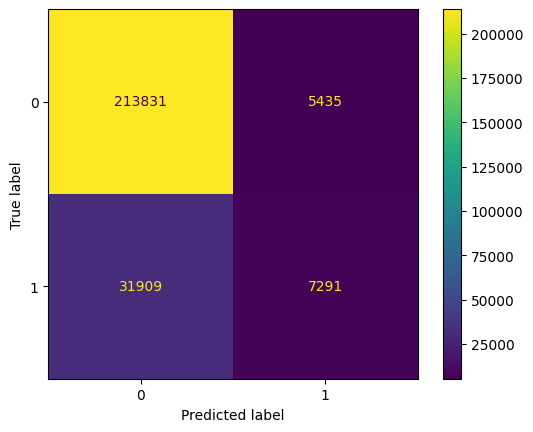

In [37]:
import xgboost as xgb
# Define hyperparameter grid
param_grid = {
    'learning_rate': [0.2],
    'max_depth': [7],
    'n_estimators': [200],
    'subsample': [0.5],
    'colsample_bytree': [1.0],
}

# Initialize XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='recall')

# Perform hyperparameter search
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the best model on test data
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy of Best Model:", test_accuracy)

# Predictions
y_pred = best_model.predict(X_test)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='macro')
print("Macro F1 Score:", f1)

# Calculate Recall score
recall = recall_score(y_test, y_pred, average='macro')
print("Macro Recall Score:", recall)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
print("Macro ROC AUC Score:", roc_auc)

from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot()

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 125136, number of negative: 701955
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005494 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2004
[LightGBM] [Info] Number of data points in the train set: 827091, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.151297 -> initscore=-1.724468
[LightGBM] [Info] Start training from score -1.724468
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you

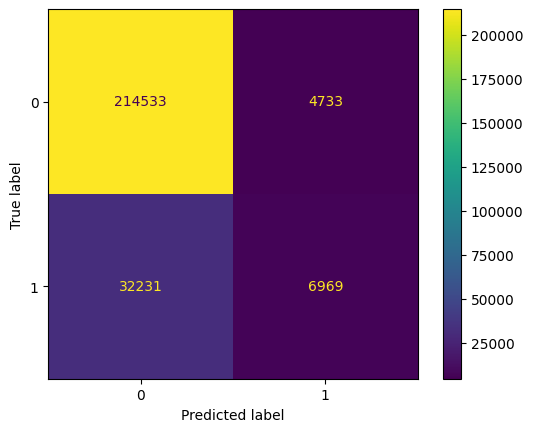

In [47]:
import lightgbm as lgb

# Define hyperparameter grid
param_grid = {
    'learning_rate': [0.2],
    'max_depth': [7],
    'n_estimators': [200],
    'subsample': [0.5],
    'colsample_bytree': [1.0],
}

# Initialize LightGBM classifier
lgb_classifier = lgb.LGBMClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=lgb_classifier, param_grid=param_grid, cv=5, scoring='recall')

# Perform hyperparameter search
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the best model on test data
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy of Best Model:", test_accuracy)

# Predictions
y_pred = best_model.predict(X_test)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='macro')
print("Macro F1 Score:", f1)

# Calculate Recall score
recall = recall_score(y_test, y_pred, average='macro')
print("Macro Recall Score:", recall)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
print("Macro ROC AUC Score:", roc_auc)

from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot()

In [57]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 156421, number of negative: 877443
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004144 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2006
[LightGBM] [Info] Number of data points in the train set: 1033864, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.151297 -> initscore=-1.724461
[LightGBM] [Info] Start training from score -1.724461
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num

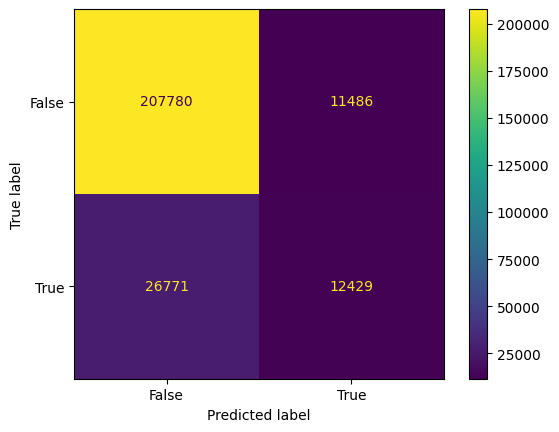

In [68]:
# Initialize models
lgbmc_model = lgb.LGBMClassifier(n_estimators=200, max_depth=7, random_state=42, learning_rate=0.2, subsample=0.5, colsample_bytree=1.0)
xgb_model = xgb.XGBClassifier(n_estimators=200, max_depth=7, random_state=42, learning_rate=0.2, subsample=0.5, colsample_bytree=1.0)

# Fit models
lgbmc_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Predict using ensemble of both the models
y_pred_proba_log = lgbmc_model.predict_proba(X_test)[:, 1]
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
y_pred_proba = (y_pred_proba_log + y_pred_proba_xgb) / 2.0

y_pred = np.where(y_pred_proba > 0.4, 1, 0)

# Evaluate performance
f1 = f1_score(y_test, y_pred, average='macro')
print("\nMacro F1 Score:", f1)

# Calculate Recall score
recall = recall_score(y_test, y_pred, average='macro')
print("Macro Recall Score:", recall)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
print("Macro ROC AUC Score:", roc_auc)

print("\nConfusion Matrix:")
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])
cm_display.plot()
plt.show()